<a href="https://colab.research.google.com/github/SupratimSircar05/MovieLens-20M/blob/master/MovieLens_20M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-03-12 11:57:08--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  27.4MB/s    in 7.6s    

2020-03-12 11:57:16 (24.9 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [2]:
!unzip ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [3]:
!pwd

/content


In [4]:
!ls

ml-20m	ml-20m.zip  sample_data


In [5]:
!ls ml-20m

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [0]:
%matplotlib inline
import os
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [7]:
print('movies.csv: ')
movies = pd.read_csv('/content/ml-20m/movies.csv',index_col=None)
movies.describe()
movies.head(5)

movies.csv: 


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print('ratings.csv: ')
ratings = pd.read_csv('/content/ml-20m/ratings.csv',index_col=None)
ratings.describe()
ratings.head(5)

ratings.csv: 


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [9]:
print('tags.csv: ')
tags = pd.read_csv('/content/ml-20m/tags.csv',index_col=None)
tags.describe()
tags.head(5)

tags.csv: 


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [10]:
print('genome-tags.csv: ')
genome_tags = pd.read_csv('/content/ml-20m/genome-tags.csv',index_col=None)
genome_tags.describe()
genome_tags.head(5)

genome-tags.csv: 


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [11]:
print('genome-scores.csv: ')
genome_scores = pd.read_csv('/content/ml-20m/genome-scores.csv',index_col=None)
genome_scores.describe()
genome_scores.head(5)

genome-scores.csv: 


,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [12]:
print('The number of movies: {}'.format(movies.count()['movieId']))
print('The number of ratings: {}'.format(ratings.count()['movieId']))

print('')
print('min value of rating: {}'.format(ratings['rating'].min()))
print('max value of rating: {}'.format(ratings['rating'].max()))

print('')
ra = ratings.groupby(ratings['userId']).count()
print('The number of user in ratings.csv: {}'.format(ra.count()[0]))
print('The minimum number of ratings per user in ratings.csv: {}'.format(ra['movieId'].min()))
print('The maximun number of ratings per user in ratings.csv: {}'.format(ra['movieId'].max()))

print('')
ra = ratings.groupby(ratings['movieId']).count()
print('The number of movies in ratings.csv: {}'.format(ra.count()[0]))
print('The minimum number of ratings per movie in ratings.csv: {}'.format(ra['userId'].min()))
print('The maximun number of ratings per movie in ratings.csv: {}'.format(ra['userId'].max()))

The number of movies: 27278
The number of ratings: 20000263

min value of rating: 0.5
max value of rating: 5.0

The number of user in ratings.csv: 138493
The minimum number of ratings per user in ratings.csv: 20
The maximun number of ratings per user in ratings.csv: 9254

The number of movies in ratings.csv: 26744
The minimum number of ratings per movie in ratings.csv: 1
The maximun number of ratings per movie in ratings.csv: 67310


In [13]:
print('The number of tags in tags.csv: {}'.format(tags.count()['userId']))
print('The number of tags in genome-tags.csv: {}'.format(genome_tags.count()['tagId']))

print('')
ra = tags.groupby(tags['userId']).count()
print('The number of user in tags.csv: {}'.format(ra.count()[0]))
print('The minimum number of tags per user in tags.csv: {}'.format(ra['movieId'].min()))
print('The maximun number of tags per user in tags.csv: {}'.format(ra['movieId'].max()))

print('')
ra = tags.groupby(tags['movieId']).count()
print('The number of movies in tags.csv: {}'.format(ra.count()[0]))
print('The minimum number of tags per movie in tags.csv: {}'.format(ra['userId'].min()))
print('The maximun number of tags per movie in tags.csv: {}'.format(ra['userId'].max()))

print('')
tags_mer = pd.merge(tags, genome_tags, how='left', left_on='tag', right_on='tag')
print('The number of tags in tags.csv but not in genome-tags.csv: {}'.format(tags_mer[(tags_mer['tagId'].isnull())].count()[0]))

The number of tags in tags.csv: 465564
The number of tags in genome-tags.csv: 1128

The number of user in tags.csv: 7801
The minimum number of tags per user in tags.csv: 1
The maximun number of tags per user in tags.csv: 20356

The number of movies in tags.csv: 19545
The minimum number of tags per movie in tags.csv: 1
The maximun number of tags per movie in tags.csv: 1994

The number of tags in tags.csv but not in genome-tags.csv: 247993


In [14]:
print('The length of genome_scores.csv: {}'.format(genome_scores.count()['movieId']))
print('max value of relevance from genome_scores.csv: {}'.format(genome_scores['relevance'].max()))
print('min value of relevance from genome_scores.csv: {}'.format(genome_scores['relevance'].min()))

print('')
ra = genome_scores.groupby(genome_scores['movieId']).count()
print('The number of movies in genome_scores.csv: {}'.format(ra.count()[0]))
print('The minimum number of tags per movie in genome_scores.csv: {}'.format(ra['tagId'].min()))
print('The maximun number of tags per movie in genome_scores.csv: {}'.format(ra['tagId'].max()))

The length of genome_scores.csv: 11709768
max value of relevance from genome_scores.csv: 1.0
min value of relevance from genome_scores.csv: 0.00024999999999997247

The number of movies in genome_scores.csv: 10381
The minimum number of tags per movie in genome_scores.csv: 1128
The maximun number of tags per movie in genome_scores.csv: 1128


In [15]:
# Analysis of the relevant data of movies in both genome_scores.csv and ratings.csv:

genome_scores_group = genome_scores.groupby(genome_scores['movieId']).mean()
ratings_group = ratings.groupby(ratings['movieId']).mean()
rat_ge_merge = pd.merge(ratings_group, genome_scores_group, how='inner', left_on='movieId', right_on='movieId')
number = rat_ge_merge.count()[0]
print('Number of movies in both genome_scores.csv and ratings.csv: {}. Take up {}% of ratings.csv'\
      .format(number, round(number/19545*100)))

ratings_genome_merge = pd.merge(ratings, genome_scores_group, how='inner', left_on='movieId', right_on='movieId')
number = ratings_genome_merge.count()[0]
print('Number of ratings where its movieId in genome_scores.csv: {}. Take up {}% of ratings.csv'\
      .format(number, round(number/20000263*100)))

print('')
ra = ratings_genome_merge.groupby(ratings_genome_merge['userId']).count()
number = ra.count()[0]
print('{} users rate the movies appearing in both genome_scores.csv and ratings.csv. Take up {}% of ratings.csv'\
      .format(number, round(number/138493*100)))
print('Minimum number of ratings per user for the movies appearing in both genome_scores.csv and ratings.csv: {}'.format(ra['movieId'].min()))

Number of movies in both genome_scores.csv and ratings.csv: 10370. Take up 53.0% of ratings.csv
Number of ratings where its movieId in genome_scores.csv: 19800443. Take up 99.0% of ratings.csv

138493 users rate the movies appearing in both genome_scores.csv and ratings.csv. Take up 100.0% of ratings.csv
Minimum number of ratings per user for the movies appearing in both genome_scores.csv and ratings.csv: 13


In [0]:
# Preprocess data
# The first column of features is userId, the next is movieId.
# The only one column of target is rating.

remove_fields = ['timestamp','tagId','relevance','rating']
target = ratings_genome_merge['rating']
feature = ratings_genome_merge.drop(remove_fields, axis=1)
features = feature.values
target = target.values

genome_scores_dict = {}
for i in range(10381):
    m_id = -1
    vec = []
    for j in range(1128):
        index = j + i * 1128
        if m_id < 0:
            m_id = genome_scores['movieId'][index]
        assert genome_scores['movieId'][index] == m_id
        assert genome_scores['tagId'][index] == j + 1
        vec.append(genome_scores['relevance'][index])
    genome_scores_dict[str(m_id)] = vec

In [17]:
# Using train_test_split here is not the best. 
# The better method is to split the data according the userId, which makes sure every user is in the test set.
# We can make it easily and quickly ( We have already included 99.86% users).
from sklearn.model_selection import train_test_split
train_features,test_features, train_target, test_target = train_test_split(features,  
                                                           target,  
                                                           test_size = 0.2,  
                                                           random_state = 0)

dict_t = {}
dict_t['userId'] = test_features[:,0]
dict_t['movieId'] = test_features[:,1]
pd_data = pd.DataFrame.from_dict(dict_t)
user_test = pd_data.groupby(pd_data['userId']).count().count()[0]

print('{}% users in test set ({} users)'.format(round(user_test/138493*100, 2), user_test ))

dict_t = {}
dict_t['userId'] = train_features[:,0]
dict_t['movieId'] = train_features[:,1]
pd_data = pd.DataFrame.from_dict(dict_t)
user_train = pd_data.groupby(pd_data['userId']).count().count()[0]

print('{}% users in training set ({} users)'.format(round(user_train/138493*100, 2), user_train ))

99.86% users in test set (138294 users)
100.0% users in training set (138493 users)


In [0]:
# Save preprocess data to '/content/verify_assumption.data'
pickle.dump((train_features, test_features, train_target, test_target, genome_scores_dict), open('/content/verify_assumption.data', 'wb'))

In [0]:
# Load preprocess data from '/content/verify_assumption.data'
train_features, test_features, train_target, test_target, genome_scores_dict = pickle.load(open('/content/verify_assumption.data', mode='rb'))

In [0]:
batch_size = 768  # batch size 
lr = 1e-3         # learning rate
feature_dim = 512 # Dimension of movie or user feature vector
Epoch = 6         # train epoch

In [0]:
class Verify_Assumption_Model(nn.Module):
    """The whole model"""
    def __init__(self):
        super(Verify_Assumption_Model, self).__init__()
        # self.emb_user = nn.Embedding(138493 + 1, 512, # use ratings['userId'].max()+1 instead of 138493+1 is better
        #                     padding_idx=0)
        self.emb_user = nn.Embedding(ratings['userId'].max()+1, 512,
                            padding_idx=0)
        
        self.movie_transfrom = nn.Sequential(
            nn.Linear(1128, 512),
            nn.Tanh(), # activation function can not be the final layer of Sequential. But it can be the first one.
            nn.Linear(512, 512)
        )
    
    def forward(self, userId, movieVector):
        v_user  = self.emb_user(userId)
        v_movie = self.movie_transfrom(movieVector)
        v_user.unsqueeze_(1)
        v_movie.unsqueeze_(2)
        return torch.bmm(v_user,v_movie)

In [24]:
import warnings
warnings.simplefilter("ignore")

len_train_features = len(train_features)
index = 0
model = Verify_Assumption_Model()
model.cuda()

loss_fn = torch.nn.MSELoss(reduce=False, size_average=False)
opt = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),
                               lr=lr, weight_decay=0)
losses = {'train':[], 'test':[]}

for epoch_i in range(Epoch):
    index = 0
    while index <= len_train_features:
        index_end = index + batch_size
        if index_end >= len_train_features:
            batch_train = train_features[index:len_train_features]
            batch_train_target = train_target[index:len_train_features]
        else:
            batch_train = train_features[index:index_end]
            batch_train_target = train_target[index:index_end]

        #assert len(batch_train) == len(batch_train_target)

        userId = batch_train[:,0]
        movieId = batch_train[:,1]
        movie_vec = []
        for i in range(len(movieId)):
            movie_vec.append(genome_scores_dict[str(movieId[i])])


        rating = model(torch.tensor(userId, requires_grad = False).cuda(),torch.tensor(movie_vec, requires_grad = False).cuda())
        rating = rating.squeeze_(1).squeeze_(1)
        loss = sum(loss_fn(rating,torch.tensor(batch_train_target,dtype=torch.float32,requires_grad = False).cuda()))

        opt.zero_grad()
        loss.backward()
        losses['train'].append(loss.detach().cpu().numpy())
        opt.step()
        if len(losses['train']) % 500 == 0:
            print('Epoch {:>3} Batch {:>4}/15840354   train_loss = {:.3f}'.format(
                        epoch_i,
                        index,
                        losses['train'][len(losses['train'])-1]))
        index += batch_size
        
    # test
    
    len_test_features = len(test_features)
    index = 0

    while index <= len_test_features:
        index_end = index + batch_size
        if index_end >= len_train_features:
            batch_train = test_features[index:len_train_features]
            batch_train_target = test_target[index:len_train_features]
        else:
            batch_train = test_features[index:index_end]
            batch_train_target = test_target[index:index_end]

        #assert len(batch_train) == len(batch_train_target)

        userId = batch_train[:,0]
        movieId = batch_train[:,1]
        movie_vec = []
        for i in range(len(movieId)):
            movie_vec.append(genome_scores_dict[str(movieId[i])])


        rating = model(torch.tensor(userId, requires_grad = False).cuda(),torch.tensor(movie_vec, requires_grad = False).cuda())
        rating = rating.squeeze_(1).squeeze_(1)
        loss = sum(loss_fn(rating,torch.tensor(batch_train_target,dtype=torch.float32,requires_grad = False).cuda()))

        losses['test'].append(loss.detach().cpu().numpy())
        if len(losses['test']) % 500 == 0:
            print('Epoch {:>3} Batch {:>4}/3960089   test_loss = {:.3f}'.format(
                        epoch_i,
                        index,
                        losses['test'][len(losses['test'])-1]))
        index += batch_size

Epoch   0 Batch 383232/15840354   train_loss = 11731.252
Epoch   0 Batch 767232/15840354   train_loss = 7939.066
Epoch   0 Batch 1151232/15840354   train_loss = 5150.809
Epoch   0 Batch 1535232/15840354   train_loss = 2980.807
Epoch   0 Batch 1919232/15840354   train_loss = 2632.171
Epoch   0 Batch 2303232/15840354   train_loss = 1874.893
Epoch   0 Batch 2687232/15840354   train_loss = 1289.654
Epoch   0 Batch 3071232/15840354   train_loss = 1311.792
Epoch   0 Batch 3455232/15840354   train_loss = 1220.564
Epoch   0 Batch 3839232/15840354   train_loss = 1209.877
Epoch   0 Batch 4223232/15840354   train_loss = 1461.529
Epoch   0 Batch 4607232/15840354   train_loss = 1435.075
Epoch   0 Batch 4991232/15840354   train_loss = 1197.248
Epoch   0 Batch 5375232/15840354   train_loss = 1375.660
Epoch   0 Batch 5759232/15840354   train_loss = 1166.945
Epoch   0 Batch 6143232/15840354   train_loss = 1189.283
Epoch   0 Batch 6527232/15840354   train_loss = 1220.326
Epoch   0 Batch 6911232/15840354

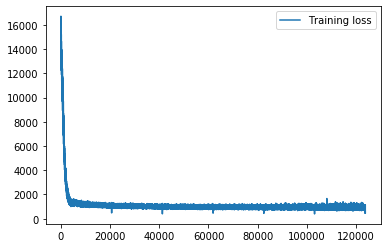

In [25]:
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

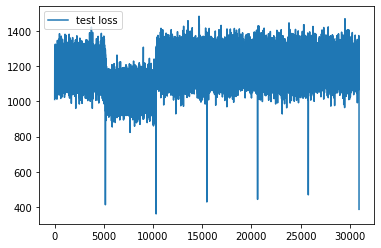

In [26]:
plt.plot(losses['test'], label='test loss')
plt.legend()
_ = plt.ylim()

In [0]:
# Save model to '/content/model.pt'
torch.save(model.state_dict(), '/content/model.pt')

In [65]:
# Load model from state_dict file '/content/model.pt'
model = Verify_Assumption_Model()
model.load_state_dict(torch.load('/content/model.pt', map_location='cpu'))

<All keys matched successfully>

In [0]:
def get_relevant_movies(id, orginal=True, movie_num=10):
    
    movie_feature = []
    movie_id = []
    movie_num += 1 # because the most relevant movie is the same movie.
    
    # Get all movie vector, You can run quickly if you save the movie vector in your memory.
    for key in genome_scores_dict.keys():
        movie_id.append(key)
        if orginal:     
            norm = np.linalg.norm(genome_scores_dict[key],ord=2) 
            movie_feature.append(genome_scores_dict[key]/norm)
        else:
            v = model.movie_transfrom(torch.tensor(genome_scores_dict[key]).cuda()).cpu().detach().numpy()
            norm = np.linalg.norm(v,ord=2) 
            movie_feature.append(v/norm)

    movie_feature = torch.tensor(movie_feature).unsqueeze_(1).cuda()

    if orginal: 
        norm = np.linalg.norm(genome_scores_dict[str(id)],ord=2)
        in_movie = torch.tensor(genome_scores_dict[str(id)]/norm).expand(10381, 1128).unsqueeze_(2).cuda()
    else:
        v = model.movie_transfrom(torch.tensor(genome_scores_dict[str(id)]).cuda()).cpu().detach().numpy()
        norm = np.linalg.norm(v,ord=2)
        in_movie = torch.tensor(v/norm).cuda().expand(10381, 512).unsqueeze_(2)
    
    similarity = torch.bmm(movie_feature,in_movie).squeeze_(1).squeeze_(1).cpu().detach().numpy()
    index = np.argpartition(similarity, -movie_num)[-movie_num:]
    
    if orginal: 
        print('Find relevant movies based on relevance vector from genome-scores.csv')
    else:
        print('Find relevant movies based on movie feature vector from training model')
    
    print('')
    print('Input Movie: {}'.format(movies[movies['movieId']==id].values[0]))
    print('')
    print('Relevant Movie:')
    
    re = []
    for i in index:
        if movie_id[i] != str(id):
            print('    {}'.format(movies[movies['movieId']==int(movie_id[i])].values[0]))
            re.append(movie_id[i])
            
    return re

In [67]:
get_relevant_movies(2,True)
pass

Find relevant movies based on relevance vector from genome-scores.csv

Input Movie: [2 'Jumanji (1995)' 'Adventure|Children|Fantasy']

Relevant Movie:
    [2047 'Gnome-Mobile, The (1967)' 'Adventure|Children|Fantasy|Musical']
    [1920 'Small Soldiers (1998)' 'Animation|Children|Fantasy|War']
    [480 'Jurassic Park (1993)' 'Action|Adventure|Sci-Fi|Thriller']
    [7781 'Twister (1990)' 'Comedy']
    [455 'Free Willy (1993)' 'Adventure|Children|Drama']
    [40851 'Zathura (2005)' 'Action|Adventure|Children|Fantasy']
    [2429 'Mighty Joe Young (1998)' 'Action|Adventure|Drama|Fantasy|Thriller']
    [46972 'Night at the Museum (2006)' 'Action|Comedy|Fantasy|IMAX']
    [2054 'Honey, I Shrunk the Kids (1989)'
 'Adventure|Children|Comedy|Fantasy|Sci-Fi']
    [1848 'Borrowers, The (1997)' 'Adventure|Children|Comedy|Fantasy']
